# US Income Prediction

### The ultimate goal of this project is to predict whether someone’s income will be above or below $50,000 based on information about them like their name and education. This notebook is primarily devoted to Exploratory Data Analysis (EDA) to better understand the data and help explain what may be drivers of high income. It also helps determine any feature engineering like grouping. 

The modeling work will be done later in another notebook in this project. A number of different models (logistic regression, KNN, decision trees) will be used to find the model that makes the best predictions. 

This data set is based on the income data set at https://archive.ics.uci.edu/ml/datasets/census+income 

# Contents
1. Proprocessing
1. Function Definitions
1. Exploratory Data Analysis
    1. General EDA
    1. Education
    1. Age
    1. Hours per Week
    1. Gender
    1. Marital Status
    1. Relationship
    1. Race
    1. Native Country
    1. Occupation
    1. Workclass
    1. Capital Gain & Capital Loss
    1. Final Weight

# 1.  Preprocessing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

Import data and start to get a feel for it

In [2]:
col_names = ['Age', 'Workclass', 'Final-Weight', 'Education', 'Education-Num', 'Marital-Status', 
             'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 
             'Hours-per-week', 'Native-Country', 'Income']
train = pd.read_csv('adult-data.csv', names = col_names, skipinitialspace = True)
train.head(15)

,Age,Workclass,Final-Weight,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-per-week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Final-Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital-Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-Gain    32561 non-null  int64 
 11  Capital-Loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
print(train.nunique())

Age                  73
Workclass             9
Final-Weight      21648
Education            16
Education-Num        16
Marital-Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-Gain        119
Capital-Loss         92
Hours-per-week       94
Native-Country       42
Income                2
dtype: int64


In [5]:
train.describe()

,Age,Final-Weight,Education-Num,Capital-Gain,Capital-Loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Looking at the head information, it looks like a '?' is used instead of a NaN. I'll switch those to NaN now. 

In [6]:
train.replace('?', np.NaN, inplace = True)
train.isnull().sum() 
#checking the dataset for NaN values .... NaN values is in just Workclass, Occupation, and Country

Age                  0
Workclass         1836
Final-Weight         0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Native-Country     583
Income               0
dtype: int64

In [7]:
# Check for overlap in missing values
# Checking to how many missing values are there for Workclass and Native-Country when Occupation is missing
# It turns out that all of the records that are missing Workclass are also missing Occupation
train[train['Occupation'].isnull()].isnull().sum()

Age                  0
Workclass         1836
Final-Weight         0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-per-week       0
Native-Country      27
Income               0
dtype: int64

In [8]:
print('Percent of records that are missing Occupation: ' + 
      '{0:.2%}'.format((train['Occupation'].isnull().sum()) / (train['Occupation'].count())))
print('Percent of records that are missing Native Country: ' + 
      '{0:.2%}'.format((train['Native-Country'].isnull().sum()) / (train['Native-Country'].count())))

Percent of records that are missing Occupation: 6.00%
Percent of records that are missing Native Country: 1.82%


Having 6% of records missing Occupation is pretty substantial. That is probably too many records to simply drop them. I could try to impute it in some way. Since Occupation, Workclass, and Country are categorical variables, I'll simply add a 'Missing' level for now. The models can pick it up. I can also look to see how missing values are distributed later.

In real life, I'd need to be careful how records end up with a missing value. Is it something that is optional to fill out, is it something that doesn't fit in one of the buckets available, something else? Also, has this or will this change over time? Will the model implementation cause this to change? If so, we'll want to be extra careful with how we are treating missing values. 

In [9]:
train.replace(np.NaN, 'MISSING', inplace = True)

Convert Gender and Income to numeric.

In [10]:
train['Gender_Male'] = train['Sex'].apply(lambda x: 1 if x == 'Male' else 0)
train.drop(['Sex'], axis = 1, inplace = True)

In [11]:
train['Income_Target'] = train['Income'].apply(lambda x: 1 if x == '>50K' else 0)
train.drop(['Income'], axis = 1, inplace = True)

# 2.  Function Definitions
These functions help create graphs used in the EDA

The BasicGraphs function creates basic graphs for a quick look at each feature's univariate results and distribution. 
Some of the options are to customize the graphs for better presentation

In [12]:


def BasicGraphs(var, var_name='', x_label_rotation=0, specify_x_order=[], order_x_by_distribution=True, 
                specify_xticklabels=[], specify_xticks=[], data=train):
    """Creates basic graphs for a quick look at each feature's univariate results and distribution
    
    Parameters
    ----------
    var : str
        The variable to graph against income
    var_name : str, optional
        An optional name to display for the variable that is more user friendly
    x_label_rotation : int, optional
        Allows for x labels to be rotated to accommodate long names
    specify_x_order : list, optional
        Allows for x to be ordered by a user passed list of level names
    order_x_by_distribution : bool, optional
        Allows for x to be ordered by the size of the levels (default is True)
    specify_xticklabels : list, optional
        Allows for x tick labels to be renamed
    specify_xticks : list, optional
        Used in conjunction with specify_xticklabels. Orderd list of xticks to be relabeled
    data : DataFrame, optional
        The data source for the graphs (default is train dataset)
    """

    plt.figure(figsize=(12,5))
    if var_name == '': var_name = var

    plt.suptitle(var_name, weight = 'bold')
    plt.subplot(1, 2, 1)
    if specify_x_order:
        sns.barplot(x = var, y = 'Income_Target', data = data, 
                    order = specify_x_order, color = 'tab:blue')
    elif order_x_by_distribution == True:
        sns.barplot(x = var, y = 'Income_Target', data = data, 
                    order = data[var].value_counts().index, color = 'tab:blue')
    else:
        sns.barplot(x = var, y = 'Income_Target', data = data, color = 'tab:blue')
    plt.title('Percent with Income >50k')
    plt.ylabel('Percent')
    plt.xlabel('')
    if specify_xticks:
        plt.xticks(ticks = specify_xticks, labels = specify_xticklabels, rotation = x_label_rotation)
    else:
        plt.xticks(rotation = x_label_rotation)

    plt.subplot(1, 2, 2)
    if specify_x_order:
        sns.countplot(x = var, data = data, 
                  order = specify_x_order, color = 'tab:blue')
    elif order_x_by_distribution == True:
        sns.countplot(x = var, data = data, 
                  order = data[var].value_counts().index, color = 'tab:blue')
    else:
        sns.countplot(x = var, data = data, color = 'tab:blue')
    plt.title('Distribution by ' + var_name)
    plt.ylabel('Count')
    plt.xlabel('')
    if specify_xticks:
        plt.xticks(ticks = specify_xticks, labels = specify_xticklabels, rotation = x_label_rotation)
    else:
        plt.xticks(rotation = x_label_rotation)

    plt.show()

The DistributionGraph function creates graphs to split out how the two income groups are distributed for a specified continuous feature. 

In [13]:
def DistributionGraph(var):
    """Graphs continuous distributions by Income"""
    line0 = train[train['Income_Target'] == 0][var]
    line1 = train[train['Income_Target'] == 1][var]
    
    plt.figure(figsize = (10, 5))
    ax = sns.kdeplot(line0, shade = True)
    sns.kdeplot(line1, shade = True)
    plt.title('Distribution of Income by ' + var, weight = 'bold')
    plt.xlabel(var)
    plt.ylabel('Percent of Distribution')
    plt.legend(['<=50K', '>50K'], loc = 'center right', frameon = False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

# 3.  Exploratory Data Analysis 
Now that I have the data prepped, I'll do a bit of EDA to understand what is going on in the data. Since there are only 15 columns in this data set, we can look at each feature individually. This will help us get a better understanding of what is going on in the data. It will also help identify possible ways to group levels or adjust features. It can also identify outliers or other things we may want to address in the data. 

## 3.A.  Some General EDA
Here I'll take a look at:
* How Income (the target) is distributed.
* Use box plots to see how some of the numeric features (Age, Education-Num, and Hours-per-week) are distributed
* Look at how the numeric features are correlated

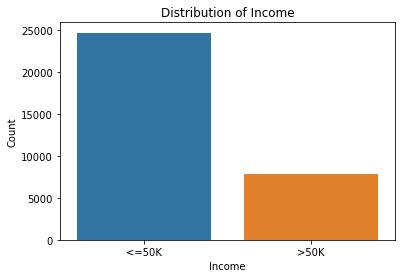

In [14]:
ax = sns.countplot(x = 'Income_Target', data = train)
ax.set(title = 'Distribution of Income', xlabel = 'Income', xticklabels = ['<=50K', '>50K'], 
       ylabel = 'Count')
plt.show()

In [15]:
train.groupby(['Income_Target'])[['Income_Target']].count()/(train['Income_Target'].count())

,Income_Target
Income_Target,
0,0.75919
1,0.24081


The data set is unbalanced with 76% of incomes <=50K. Any model I build will need to at a minimum do better than the 76% accuracy achievable from simply predicting everyone makes less than 50K.

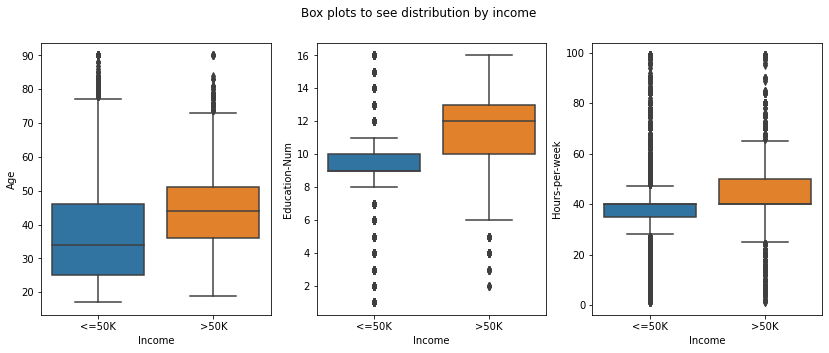

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 5))
fig.suptitle('Box plots to see distribution by income')
sns.boxplot(y = 'Age', x = 'Income_Target',  data = train, ax = axes[0])
axes[0].set(xlabel = 'Income', xticklabels = ['<=50K', '>50K'])
sns.boxplot(y = 'Education-Num', x = 'Income_Target',  data = train, ax = axes[1])
axes[1].set(xlabel = 'Income', xticklabels = ['<=50K', '>50K'])
sns.boxplot(y = 'Hours-per-week', x = 'Income_Target',  data = train, ax = axes[2])
axes[2].set(xlabel = 'Income', xticklabels = ['<=50K', '>50K'])

plt.show()

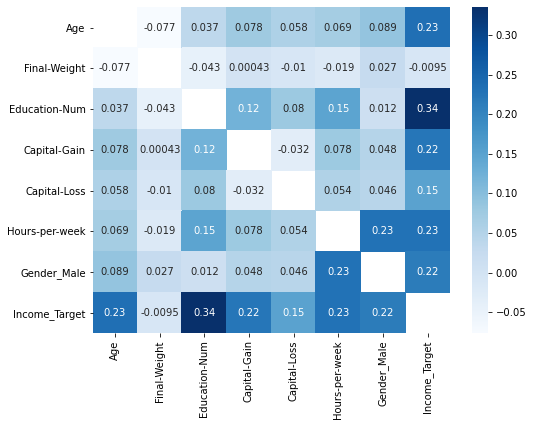

In [17]:
corr = train.corr()
corr_mask = corr.apply(lambda x: x == 1)
plt.figure(figsize = (8, 6))
sns.heatmap(train.corr(), cmap = 'Blues', annot = True, mask = corr_mask)

### General EDA observations:

* This data set is a bit skewed with only about a quarter of people having an income > $50k

* Education is the most strongly correlated numerical feature with Income. People with more education are more likely to make more. 
* Older people, people who work more, men, and people with investments that are making capital gains and losses also more likely to make more than $50k. 
* Men are also more likely to work longer hours. 

In general, this lines up pretty well with what I'd expect. 


## 3.B.  Education

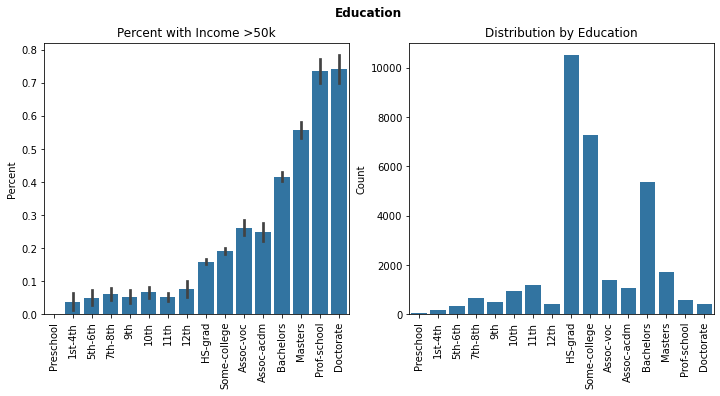

In [18]:
ed_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 
         'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
BasicGraphs('Education', x_label_rotation=90, specify_x_order=ed_order)

In [19]:
def EducationNumGrouping(EdNum):
    """Function to create Education groups"""
    if EdNum < 9:
        return '1. <HS-grad'
    elif EdNum == 9:
        return '2. HS-grad'
    elif EdNum == 10:
        return '3. Some-college'
    elif EdNum in (11, 12):
        return '4. Assoc'
    elif EdNum == 13:
        return '5. Bachelors'
    elif EdNum == 14:
        return '6. Masters'
    elif EdNum in (15, 16):
        return '7. Prof-School & Doctorate'
    else:
        return 'Other'

In [20]:
train['Education-Group'] = train['Education-Num'].apply(lambda x: EducationNumGrouping(x))

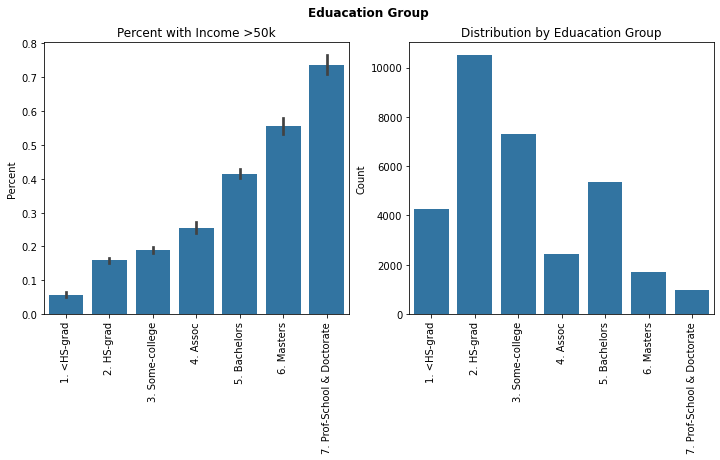

In [21]:
ed_group_order = np.sort(train['Education-Group'].unique()).tolist()
BasicGraphs('Education-Group', 'Eduacation Group', x_label_rotation=90, 
            specify_x_order=ed_group_order)

### Education Observations
Education and Education-Num are basically identical and 100% correlated. They are just different ways to present the same information. 

Education is clearly hugely important. People with less than a high school grad are very unlikely to have a high income. People with between a high school degree and less than a Bachelors degree have a moderate chance of a high income. People with advanced degrees have a high probability of a high income. 

I created the following groups which seem pretty reasonable. 
* Less than a high school grad - May want to split out 4th grade or less, although this is may be too small to be worth splitting out
* High school grad
* Some college
* Associates degree
* Bachelors degree
* Masters
* Prof-school & Doctorate

## 3.C.  Age

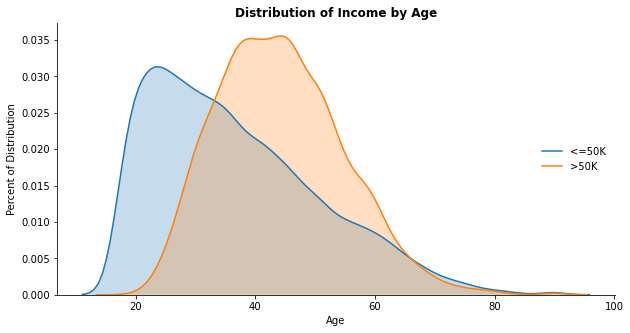

In [22]:
DistributionGraph('Age')

In [23]:
train['Age_80'] = train['Age'].apply(lambda x: 80 if x >= 80 else x)

[]

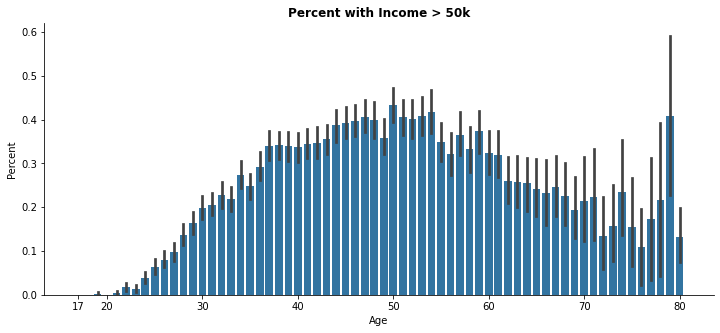

In [24]:
plt.figure(figsize = (12, 5))
ax = sns.barplot(x = 'Age_80', y = 'Income_Target', data = train, color = 'tab:blue')
plt.title('Percent with Income > 50k', weight = 'bold')
plt.ylabel('Percent')
ax.set(xlabel = 'Age', xticks = [0, 3, 13, 23, 33, 43, 53, 63], xticklabels = ['17', '20', '30', '40', '50', '60', '70', '80'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot()

### Age Observations
* The percent of people with incomes over $50k increase as people age, peaking around 50. It then decreases from there on. 
* There aren't a lot of people over 80 so I grouped people 80+ together. 

## 3.D.  Hours/Week

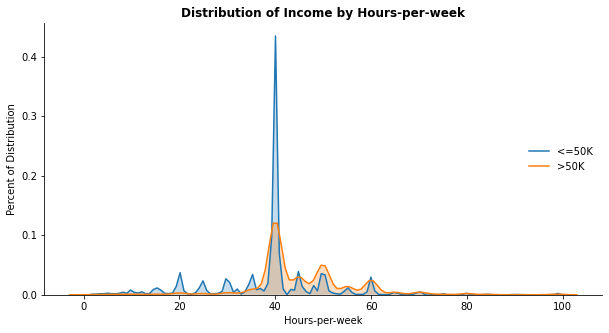

In [25]:
DistributionGraph('Hours-per-week')

In [26]:
# Create hour groups to better see what is happening. 
# Also this data is probably not linear in its response. 
# i.e. Moving from 37 to 39 hours seems like it is very different than moving from 39 to 41 hours. 

def HoursGrouping(Hrs):
    if Hrs < 30:
        return '1 < 30 hrs'
    elif Hrs < 35:
        return '2 30 - 34 hrs'
    elif Hrs < 40:
        return '3 35 - 39 hrs'
    elif Hrs == 40:
        return '4 40 hrs'
    elif Hrs <= 45:
        return '5 41 - 45 hrs'
    elif Hrs <= 50:
        return '6 46 - 50 hrs'
    elif Hrs < 60:
        return '7 51 - 59 hrs'
    else:
        return '8 >= 60 hrs'

In [27]:
train['Hours-per-week-group'] = train['Hours-per-week'].apply(lambda x: HoursGrouping(x))

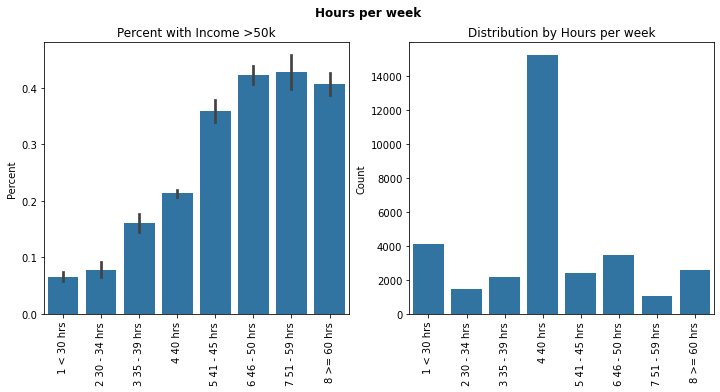

In [28]:
hrs_group_order = np.sort(train['Hours-per-week-group'].unique()).tolist()
BasicGraphs('Hours-per-week-group', 'Hours per week', x_label_rotation=90, 
            specify_x_order=hrs_group_order)

## Hours observations
* Half of people work 40 hours a week. 
* People that work more than 40 hours are almost twice as likely as people who work 40 hours to make over 50K. 
* People who work 34 hours or less are unlikely to make more than 50K. 

* For modeling I will probably group hours a bit more. I could create a group for working >45 hours and probably another group for <35 hours to use for regression models.

## 3.E.  Gender

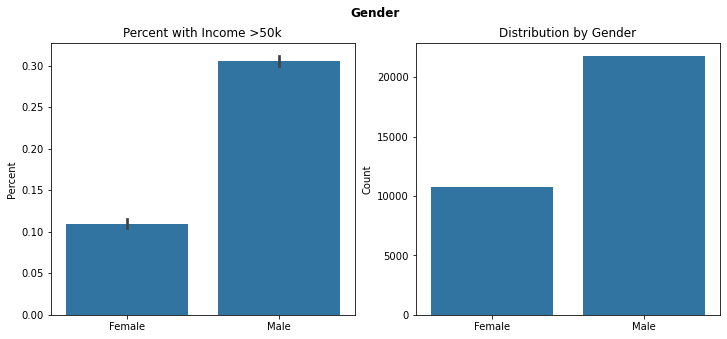

In [30]:
BasicGraphs('Gender_Male', 'Gender', order_x_by_distribution=False, 
            specify_xticklabels=['Female', 'Male'], specify_xticks = [0,1])

### Gender observations
* Wow! I was expecting males to be substantially more likely to make more than 50K than women, but I wasn't expecting it to result in almost to result in around a 3x difference. 
* Males are also substantially more represented in this data set. 
* I'll keep an eye out for this in other variables that I look at (Marital Status and Relationship).

## 3.F.  Marital Status

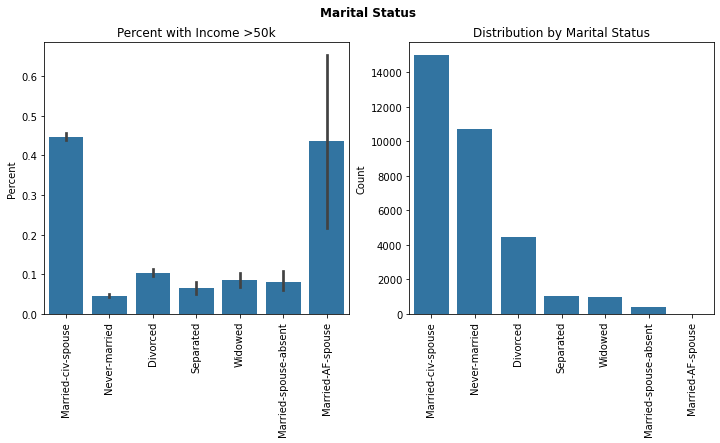

In [31]:
BasicGraphs('Marital-Status', 'Marital Status', x_label_rotation=90)

* Seems like married is similiar whether or not the spouse is civilian or Armed Forces 
    * I'll group these together since there are so few AF spouses
* Also Divorced and Married-spouse-absent have similiar univariate results,
    * I will consider grouping them together in the future

In [32]:
train['Marital-Status-Group'] = train['Marital-Status'].apply(
    lambda x: 'Married-spouse' if x in ('Married-AF-spouse', 'Married-civ-spouse') else x)

I'm curious about how much age might be playing into the rates of income >50k being so low for Never-married. I'll look at the age distribution for Never-married and Married to see what kind of impact age might be having.

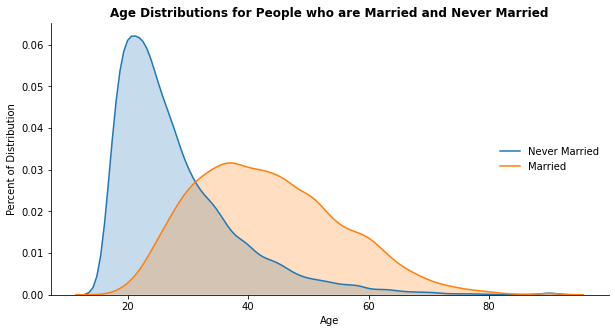

In [33]:
mask = (train['Marital-Status-Group'] == 'Married-spouse') | (train['Marital-Status-Group'] == 'Never-married')
married_never = train[mask]
married = train[train['Marital-Status-Group'] == 'Married-spouse']
never_married = train[train['Marital-Status-Group'] == 'Never-married']

plt.figure(figsize = (10, 5))
ax = sns.kdeplot(never_married['Age'], shade = True)
sns.kdeplot(married['Age'], shade = True)
plt.title('Age Distributions for People who are Married and Never Married', weight = 'bold')
plt.xlabel('Age')
plt.ylabel('Percent of Distribution')
plt.legend(['Never Married', 'Married'], loc = 'center right', frameon = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

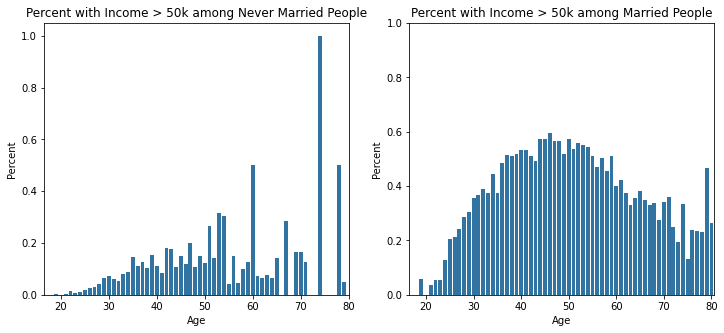

In [34]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
ax2 = sns.barplot(x = 'Age_80', y = 'Income_Target', data = never_married, color = 'tab:blue', ci = None)
plt.title('Percent with Income > 50k among Never Married People')
ax2.set(xlabel = 'Age', xticks = [3, 13, 23, 33, 43, 53, 63], xticklabels = ['20', '30', '40', '50', '60', '70', '80'])
plt.ylabel('Percent')

plt.subplot(1, 2, 2)
ax1 = sns.barplot(x = 'Age_80', y = 'Income_Target', data = married, color = 'tab:blue', ci = None)
plt.title('Percent with Income > 50k among Married People')
ax1.set(xlabel = 'Age', xticks = [3, 13, 23, 33, 43, 53, 63], xticklabels = ['20', '30', '40', '50', '60', '70', '80'])
ax1.set_ylim(top = 1)
plt.ylabel('Percent')
plt.show()

### Marital Status observations
* Married people are at least 4 times more likely to make more than $50k than other people.
* Never married people are the least likely to have an income >50K. I looked into how much age might be driving this. Never married people make substantially less than married people at all ages. 
* I grouped civilian and armed forces married together, since they have similiar probabilities of a high income and there are very few AF spouses. 
* I could potentially group Married-spouse-absent with divorced if needed. 

## 3.G.  Relationship

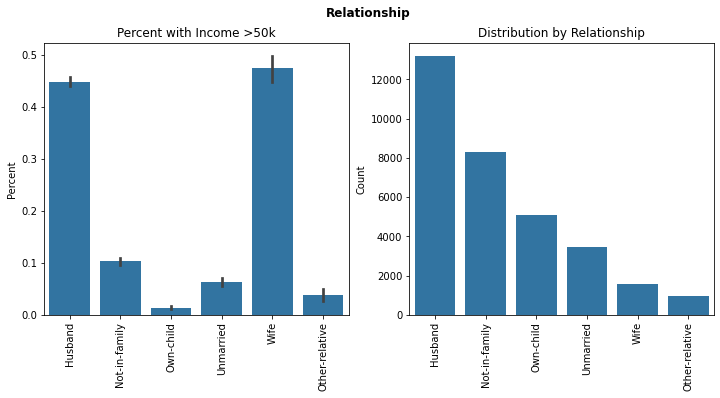

In [35]:
BasicGraphs('Relationship', x_label_rotation=90)

In [38]:
pd.crosstab(train['Marital-Status-Group'], train['Relationship'])

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
Marital-Status-Group,,,,,,
Divorced,0,2404,110,328,1601,0
Married-spouse,13193,17,125,96,0,1568
Married-spouse-absent,0,211,32,45,130,0
Never-married,0,4706,611,4485,881,0
Separated,0,420,55,99,451,0
Widowed,0,547,48,15,383,0


In [39]:
pd.crosstab(train['Gender_Male'], train['Relationship'])

Relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
Gender_Male,,,,,,
0,1,3875,430,2245,2654,1566
1,13192,4430,551,2823,792,2


### Relationship observations
* Married people are much more likely to have a high income. 
* For married people, the husband was chosen for Relationship the vast majority of the time (88%). Maybe this is related to who filled out the survey. 
* It's interesting that the gender gap isn't showing up between husbands and wifes
    * There may be well be some sampling bias here. This could help explain why the gender gap is so large.
    * The other relationship statuses are fairly balanced other than Unmarried which has a lot more women
* There's a lot of overlap with Marital Status here. 

## 3.H.  Race

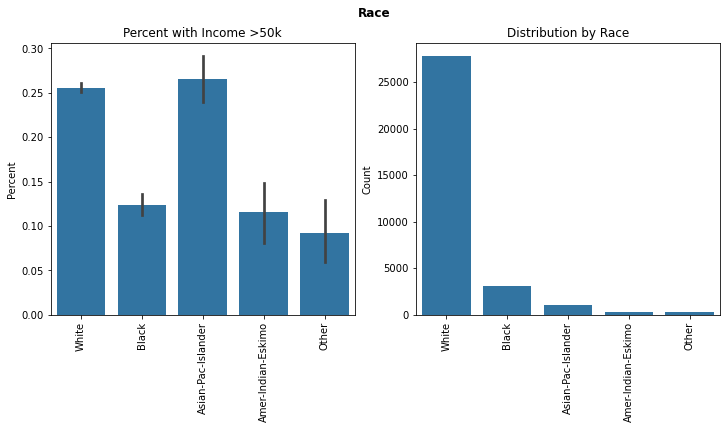

In [40]:
BasicGraphs('Race', x_label_rotation=90)

In [41]:
pd.crosstab(train['Race'], train['Income_Target']).sort_values(0, ascending = False)

Income_Target,0,1
Race,,
White,20699,7117
Black,2737,387
Asian-Pac-Islander,763,276
Amer-Indian-Eskimo,275,36
Other,246,25


### Race Observations
* Rates of income >50K for people who are classified as White and Asian-Pac-Islander are comparable and both double those of people who are classified as Black, Amer-Indian-Eskimo, or Other. 

* There are few people who are classified as Amer-Indian-Eskimo and Other in this data. They also have very similar results to Black in this univariate view. Consider grouping them together. 

## 3.I.  Country

In [42]:
def CountryGrouping(country):
    """Function to create country groups
    Most countries only have less than 100 people and probably aren't too predictive on their own. 
    """
    if country in ('United-States', 'Mexico', 'Canada'):
        return country
    elif country in ('Cambodia', 'India', 'Japan', 'China', 'Philippines', 'Vietnam', 'Laos', 'Taiwan', 
                     'Thailand', 'Hong', 'Iran'):
        return 'Asia'
    elif country in ('Cuba', 'Jamaica', 'Dominican-Republic', 'Haiti', 'Trinadad&Tobago'):
        return 'Caribbean'
    elif country in ('Honduras', 'Guatemala', 'Nicaragua', 'El-Salvador'):
        return 'Central America'
    elif country in ('England', 'Germany', 'Greece', 'Italy', 'Poland', 'Portugal', 'Ireland', 'France', 
                     'Hungary', 'Scotland', 'Yugoslavia', 'Holand-Netherlands'):
        return 'Europe'
    elif country in ('Ecuador', 'Columbia', 'Peru'):
        return 'South America'
    elif country in ('Puerto-Rico', 'Outlying-US(Guam-USVI-etc)'):
        return 'US-Territory'    
    else:
        return country

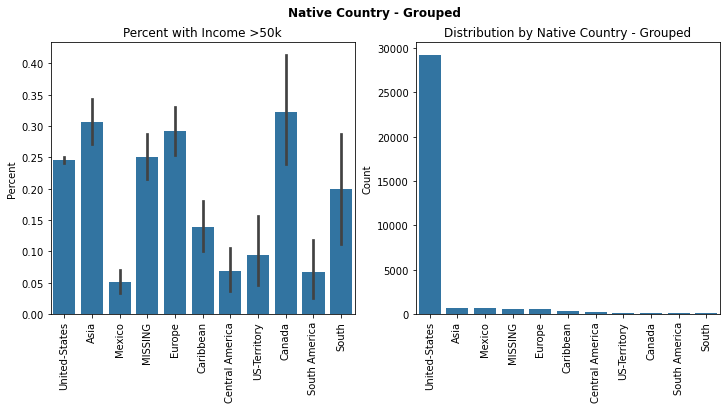

In [43]:
train['Native-Country-Group'] = train['Native-Country'].apply(lambda x: CountryGrouping(x))
BasicGraphs('Native-Country-Group', 'Native Country - Grouped', x_label_rotation=90)

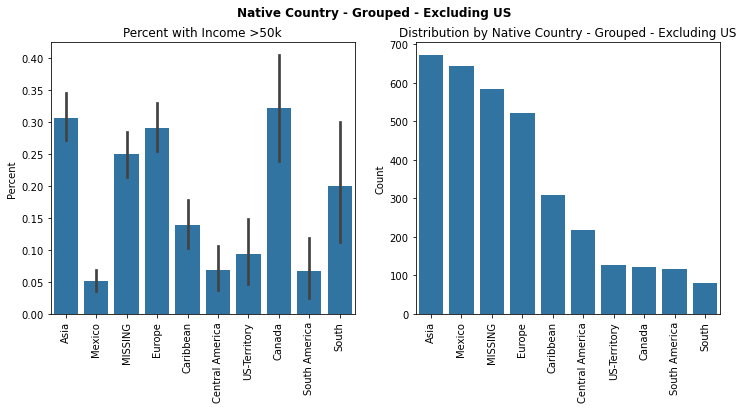

In [44]:
# Take a look at the counts by region to help identify regions that are too small or can be grouped. 
# Exclude the US from this graph to be able to see the small counts more easily. 
regions_exUS = train[train['Native-Country-Group'] != 'United-States']
BasicGraphs('Native-Country-Group', 'Native Country - Grouped - Excluding US', x_label_rotation=90, data=regions_exUS)

In [45]:
x = train[train['Native-Country'] == 'United-States']['Age'].count()/train['Native-Country'].count()
print('The percent of people that are native to the US is: ' + '{0:.1%}'.format(x))

The percent of people that are native to the US is: 89.6%


### Country Observations:

I took the list of countries from the documentation online. I assume that Hong meant Hong Kong. I'm not quite sure what to do with South. It could be South Korea, South America, or the South (of the US). Iran is the only country from the Middle East and it doesn't have very many observations, so I grouped it with Asia. 

* 90% of people are from the United States.
* People from Mexico, Central America, and South America have the lowest percent high incomes. (Could consider grouping Central America and possibly South America with Mexico. 
* People from Asia, Europe, and Canada are more likely to have higher incomes. 

## 3.J.  Occupation

In [46]:
# There's not a ton of different occupations. 
# Shouldn't need too much grouping. Mainly Armed-Forces and possibly Priv-house-serv.
train.groupby('Occupation')['Occupation'].count().sort_values(ascending = False)

Occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
MISSING              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: Occupation, dtype: int64

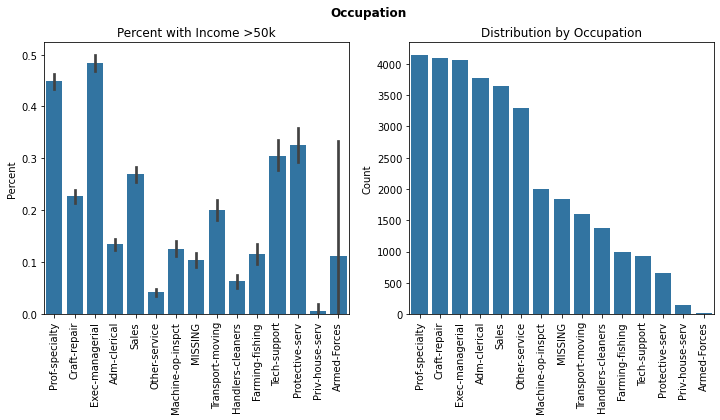

In [47]:
BasicGraphs('Occupation', x_label_rotation = 90)

Armed-Forces has hardly any observations. I'm going to group it to help prevent overfitting. Protective-serv seems like a fairly logical place to put it.

### Occupation Notes
* There is a big spread of income distributions for occupation. 
    * Exec-managerial and Prof-specialty are most likely to make >50K
    * Service occupations are very unlikely to make >50K

## 3.K.  Workclass

In [48]:
def OccupationGrouping(occupation):
    if occupation == 'Armed-Forces':
        return 'Protective-serv'
    else:
        return occupation

In [49]:
train['Occupation-Group'] = train['Occupation'].apply(lambda x: OccupationGrouping(x))

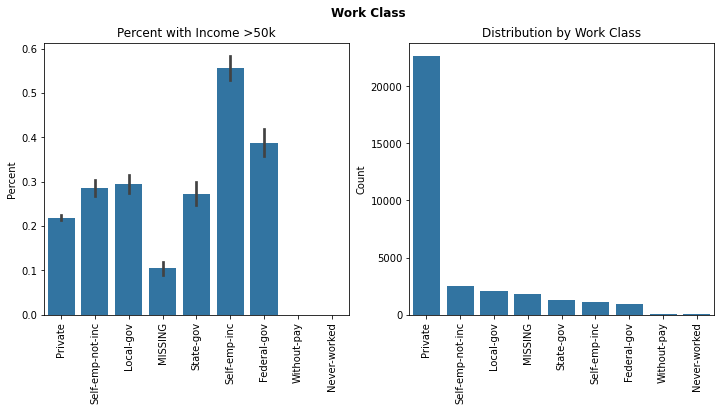

In [50]:
BasicGraphs('Workclass', 'Work Class', x_label_rotation=90)

In [51]:
pd.crosstab(train['Occupation'], train['Workclass'])

Workclass,Federal-gov,Local-gov,MISSING,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Occupation,,,,,,,,,
Adm-clerical,317,283,0,0,2833,31,50,253,3
Armed-Forces,9,0,0,0,0,0,0,0,0
Craft-repair,64,146,0,0,3195,106,531,56,1
Exec-managerial,180,214,0,0,2691,400,392,189,0
Farming-fishing,8,29,0,0,455,51,430,15,6
Handlers-cleaners,23,47,0,0,1273,2,15,9,1
MISSING,0,0,1836,7,0,0,0,0,0
Machine-op-inspct,14,12,0,0,1913,13,36,13,1
Other-service,35,193,0,0,2740,27,175,124,1


* Without-pay and Never-worked have hardly any observations so I'll group them with other levels. 
* Never-worked is always Missing in Occupation, so I'll group it with Missing in Workclass.
* Without-pay has information in Occupation. I'll group it with Private since Private is the largest level and makes some sense to have it grouped with it. 

In [52]:
def WorkclassGrouping(workclass):
    if workclass == 'Never-worked':
        return 'MISSING'
    elif workclass == 'Without-pay':
        return 'Private'
    else:
        return workclass

train['Workclass-Group'] = train['Workclass'].apply(lambda x: WorkclassGrouping(x))

### Workclass Notes 
    
* Workclass sees a bit of a spread, but not as pronounced as Occupation
    * Private is by far the largest level. It also has a lower percent of people making >50K than basically every other workclass other than Missing
    * Self-emp-inc has the highest percent of people making >50K

## 3.L.  Capital Gain & Capital Loss

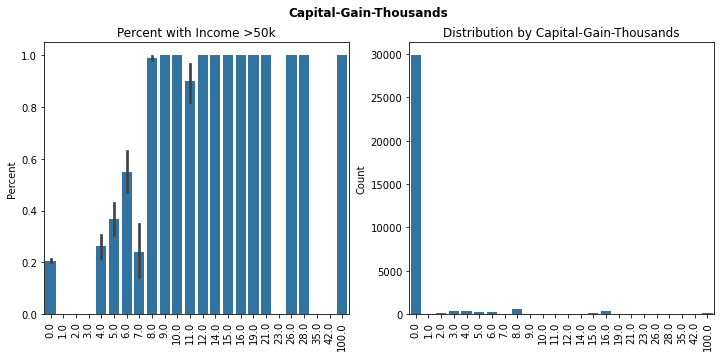

In [53]:
# Take a quick look at how Capital Gains are distributed
train['Capital-Gain-Thousands'] = train['Capital-Gain'].apply(lambda x: np.ceil(x/1000))
BasicGraphs('Capital-Gain-Thousands', order_x_by_distribution=False, x_label_rotation=90)

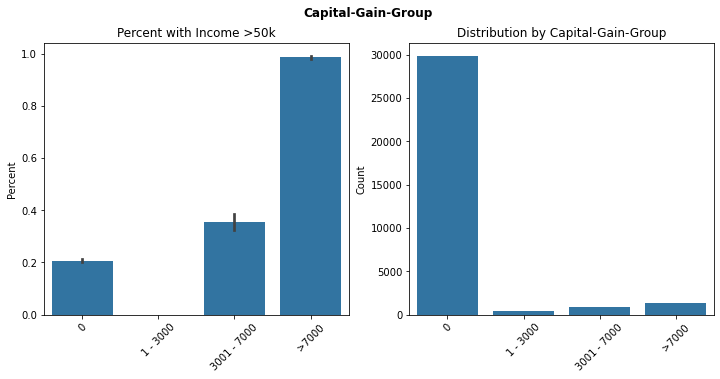

In [54]:
# Create simple groupings based on the graphs above. 
def CapitalGainGrouping(gain):
    if gain == 0:
        return '0'
    elif gain <= 3000:
        return '1 - 3000'
    elif gain <= 7000:
        return '3001 - 7000'
    else:
        return '>7000'
    
train['Capital-Gain-Group'] = train['Capital-Gain'].apply(lambda x: CapitalGainGrouping(x))
Capital_Gain_group_order = np.sort(train['Capital-Gain-Group'].unique()).tolist()
BasicGraphs('Capital-Gain-Group', specify_x_order=Capital_Gain_group_order, x_label_rotation=45)

In [55]:
# There's some interesting behavior going on. Let's take a closer look.
pd.options.display.max_rows = 999
cg = pd.crosstab(train['Capital-Gain'], train['Income_Target'], margins=True)
cg

Income_Target,0,1,All
Capital-Gain,,,
0,23685,6164,29849
114,6,0,6
401,2,0,2
594,34,0,34
914,8,0,8
991,5,0,5
1055,25,0,25
1086,4,0,4
1111,1,0,1


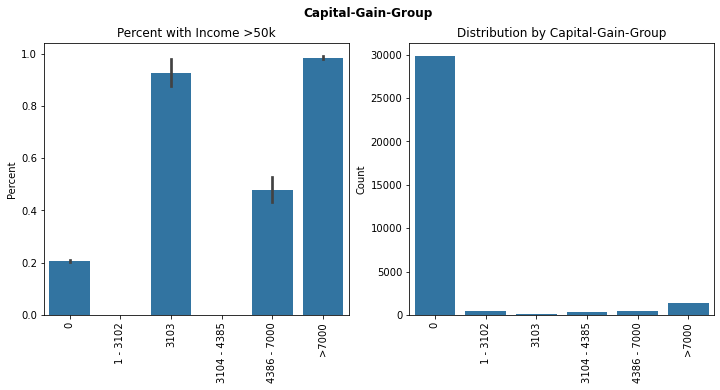

In [56]:
# There are some surprising results when looking at how Income is split by capital gain level.
# Create some groupings to better visualize this
def CapitalGainGrouping(gain):
    if gain == 0:
        return '0'
    elif gain < 3103:
        return '1 - 3102'
    elif gain == 3103:
        return '3103'
    elif gain < 4386:
        return '3104 - 4385'
    elif gain < 7000:
        return '4386 - 7000' 
    else:
        return '>7000'
    
train['Capital-Gain-Group'] = train['Capital-Gain'].apply(lambda x: CapitalGainGrouping(x))
Capital_Gain_group_order = np.sort(train['Capital-Gain-Group'].unique()).tolist()
BasicGraphs('Capital-Gain-Group', specify_x_order=Capital_Gain_group_order, x_label_rotation=90)

In [57]:
pd.crosstab(train['Capital-Gain-Group'], train['Income_Target'])

Income_Target,0,1
Capital-Gain-Group,,
0,23685,6164
1 - 3102,472,0
3103,7,90
3104 - 4385,309,0
4386 - 7000,227,208
>7000,20,1379


In [58]:
# There are a lot of levels where there are lots of people making >50K with very few people making <=50K. 
# It looks like Capital Gain is fairly binary for a given level. 
# Grouping based on the majority of the Income_Target count for a given level could be a way to create groupings. 
cg.sort_values(by=['All'], ascending=False).head(15)

Income_Target,0,1,All
Capital-Gain,,,
All,24720,7841,32561
0,23685,6164,29849
15024,0,347,347
7688,0,284,284
7298,0,246,246
99999,0,159,159
3103,7,90,97
5178,0,97,97
4386,12,58,70


### Capital Losses

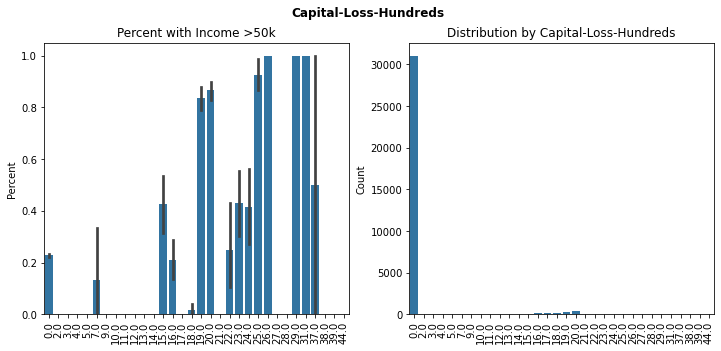

In [59]:
# Take a quick look at how Capital Losses are distributed
train['Capital-Loss-Hundreds'] = train['Capital-Loss'].apply(lambda x: np.ceil(x/100))
BasicGraphs('Capital-Loss-Hundreds', order_x_by_distribution=False, x_label_rotation=90)

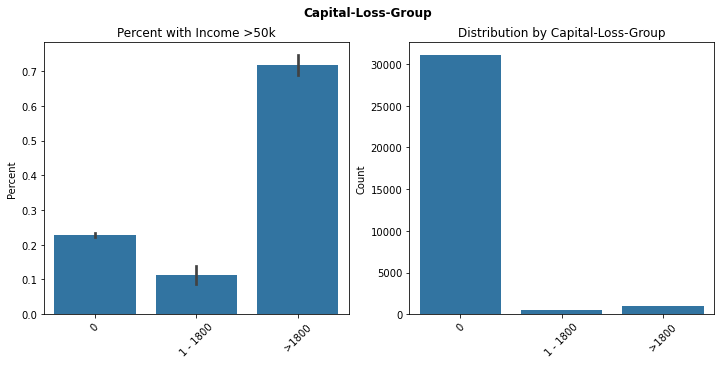

In [60]:
# Create simple groupings based on the graphs above. 
def CapitalLossGrouping(gain):
    if gain == 0:
        return '0'
    elif gain <= 1800:
        return '1 - 1800'
    else:
        return '>1800'
    
train['Capital-Loss-Group'] = train['Capital-Loss'].apply(lambda x: CapitalLossGrouping(x))
Capital_Loss_group_order = np.sort(train['Capital-Loss-Group'].unique()).tolist()
BasicGraphs('Capital-Loss-Group', specify_x_order=Capital_Loss_group_order, x_label_rotation=45)

In [62]:
cl = pd.crosstab(train['Capital-Loss'], train['Income_Target'], margins=True)
cl.sort_values(by=['All'], ascending=False).head(10)

Income_Target,0,1,All
Capital-Loss,,,
All,24720,7841,32561
0,23974,7068,31042
1902,13,189,202
1977,0,168,168
1887,0,159,159
1848,0,51,51
1485,20,31,51
2415,0,49,49
1602,47,0,47


### Capital Gain & Capital Loss Observations
* The vast majority (87%) of people don't have any capital gains or losses

#### Capital Gains
* The breakdown of capital gains is really interesting. It seems like there is more signal here than I'd expect. This is an area where prudent groupings could help improve model predictions. 
    * I'm surprised that all people with capital gains <3000 (and more than $0) make <50K.
    
    * 98.6% of people with capital gains >7000 make >50K. 
    * Between 3,000 and 7,000 there is a mix of people in both income buckets.
    * 50% of people with gains between 4,651 and 7,000 make <=50K. However, most levels only have people in on income bucket. For example, 
        * All 69 people with capital gains of 5,013 make <50K
        * All 97 people with capital gains of 5,178 make >50K
        * I wonder if capital gain information may be after taxes. Maybe capital gains for people with high incomes are being taxed at a higher rate than the capital gains for people with a lower income. This could help to explain why so many levels seem to be associated with only one income group. I looked for tax rates from the early 1990s when this data is from to see if I could see if applying taxes to a capital gain of $7,500 for example would result in the observations we saw here. I didn't get anything obvious here. 
    * This is where it would be good to talk with a subject matter expert to see if I could get additional insights into this data
    
#### Capital Losses
* Capital Losses behave fairly similarly to Capital Gains
    * People with a small amount of losses are less likely than other people to make >50K.
    * Most levels also only have people in one income bucket.
* People only have Capital Gains or Losses, there is no overlap between them. 

## 3.M.  Final Weight
Final weight is a continuous variable that sounds like it is used to weight the survey data to try to correct for known sampling biases. 

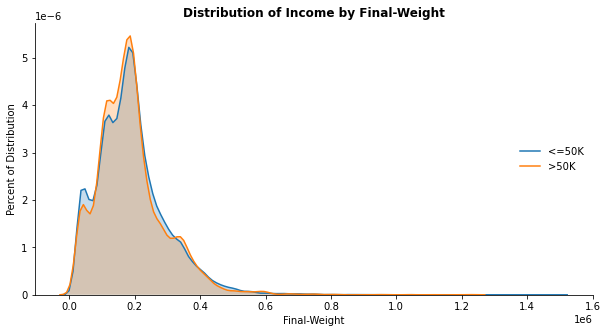

In [63]:
DistributionGraph('Final-Weight')

### Final Weight Observations
* I didn't expect this feature to be too helpful, especially when given all the other data that we have. 
* A quick look suggests that it will be marginally helpful at best

# Concluding Thoughts
* All of the features in the dataset other than Final-Weight are predictive of income (at a univariate level at least).
* Education, Marital Status, and Gender are all very predictive and do a good job of differentiating people. 
* Grouping smaller levels of features could help reduce the potential of overfitting when modeling. 